<h1 align ="center">Preprocessing the Data from Kaggle</h1>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
import numpy as np
from PIL import Image


Mounted at /content/drive


<h2 align ="center">Importing the covid patient data</h2>

In [ ]:
folder_path = '/content/drive/MyDrive/Data/covid images 1'

image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.png')]
num_images = len(image_files)
image_array1 = np.empty((num_images,299*299))

for i, file_name in enumerate(image_files):
    # open the image file using PIL
    image = Image.open(os.path.join(folder_path, file_name))
    # convert the image to a 1D numpy array and add it to the image_array
    temp_arr = arr = np.array(image)
    arr2 =temp_arr.flatten()
    image_array1[i, :] = arr2

folder_path = '/content/drive/MyDrive/Data/covid images 2'

image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.png')]


num_images = len(image_files)
image_array2 = np.empty((num_images,299*299))

for i, file_name in enumerate(image_files):
    # open the image file using PIL
    image = Image.open(os.path.join(folder_path, file_name))
    # convert the image to a 1D numpy array and add it to the image_array
    temp_arr = arr = np.array(image)
    arr2 =temp_arr.flatten()
    image_array2[i, :] = arr2



<h2 align ="center">Importing the normal patient data</h2>

In [ ]:

folder_path = '/content/drive/MyDrive/Data/normal images 1'

image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.png')]


num_images = len(image_files)
image_array3 = np.empty((num_images,299*299))

for i, file_name in enumerate(image_files):
    # open the image file using PIL
    image = Image.open(os.path.join(folder_path, file_name))
    # convert the image to a 1D numpy array and add it to the image_array
    temp_arr = arr = np.array(image)
    arr2 =temp_arr.flatten()
    image_array3[i, :] = arr2


folder_path = '/content/drive/MyDrive/Data/Normal images 2'

image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.png')]


num_images = len(image_files)
image_array4 = np.empty((num_images,299*299))

for i, file_name in enumerate(image_files):
    # open the image file using PIL
    image = Image.open(os.path.join(folder_path, file_name))
    # convert the image to a 1D numpy array and add it to the image_array
    temp_arr = arr = np.array(image)
    arr2 =temp_arr.flatten()
    image_array4[i, :] = arr2


folder_path = '/content/drive/MyDrive/Data/Normal images 3'

image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.png')]


num_images = len(image_files)
image_array5 = np.empty((num_images,299*299))

for i, file_name in enumerate(image_files):
    # open the image file using PIL
    image = Image.open(os.path.join(folder_path, file_name))
    # convert the image to a 1D numpy array and add it to the image_array
    temp_arr = arr = np.array(image)
    arr2 =temp_arr.flatten()
    image_array5[i, :] = arr2



<h2 align ="center">Stacking all the data into one array and adding corresponding labels</h2>

In [ ]:
X =  np.vstack((image_array1, image_array2,image_array3, image_array4,image_array5))

y = np.vstack((np.ones((image_array1.shape[0], 1)), np.ones((image_array2.shape[0], 1)),np.zeros((image_array3.shape[0], 1)),np.zeros((image_array4.shape[0], 1)),np.zeros((image_array5.shape[0], 1))))
print("Dimensions of the input array",X.shape)


<h2 align ="center">Deleting redundant arrays to save space in RAM</h2>

In [ ]:
del image_array1
del image_array2
del image_array3
del image_array4
del image_array5


<h2 align ="center">Normalizing the data before compression</h2>

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
del X 

<h2 align ="center">Initializing and then starting the compression model</h2>

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3000)
scaled_data = pca.fit_transform(scaled_data)
print("Reduced data dimensions: ",scaled_data.shape)

<h2 align ="center">Cumulative variance retained by reducing the columns from 89401 to 3000</h2>

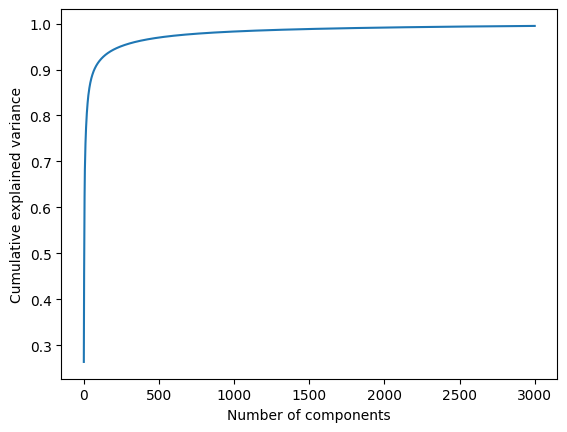

In [ ]:
cumulative_var = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, pca.n_components_ + 1), cumulative_var)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

<h2 align ="center">Saving the compressed data as well as the scaling and compression models for future use</h2>

In [ ]:
np.save('/content/drive/MyDrive/Data/input_data.npy', scaled_data)

In [ ]:
np.save('/content/drive/MyDrive/Data/output_labels.npy', y)

In [ ]:
import pickle

In [ ]:
with open('/content/drive/MyDrive/Data/pca_model.pkl', 'wb') as file:
    pickle.dump(pca, file)
file.close()

In [ ]:
with open('/content/drive/MyDrive/Data/scaler_model.pkl', 'wb') as file:
    pickle.dump(scaler, file)
file.close()